# <span style= "color:cyan"> BOOK CROSSING RECOMMENDATION SYSTEM </SPAN>

`Group 9:`

* Ronald Nyagaka
* Sharon Atieno
* Pamela Awino
* Isaac Muturi
* Leonard Rotich
* Paul Musau

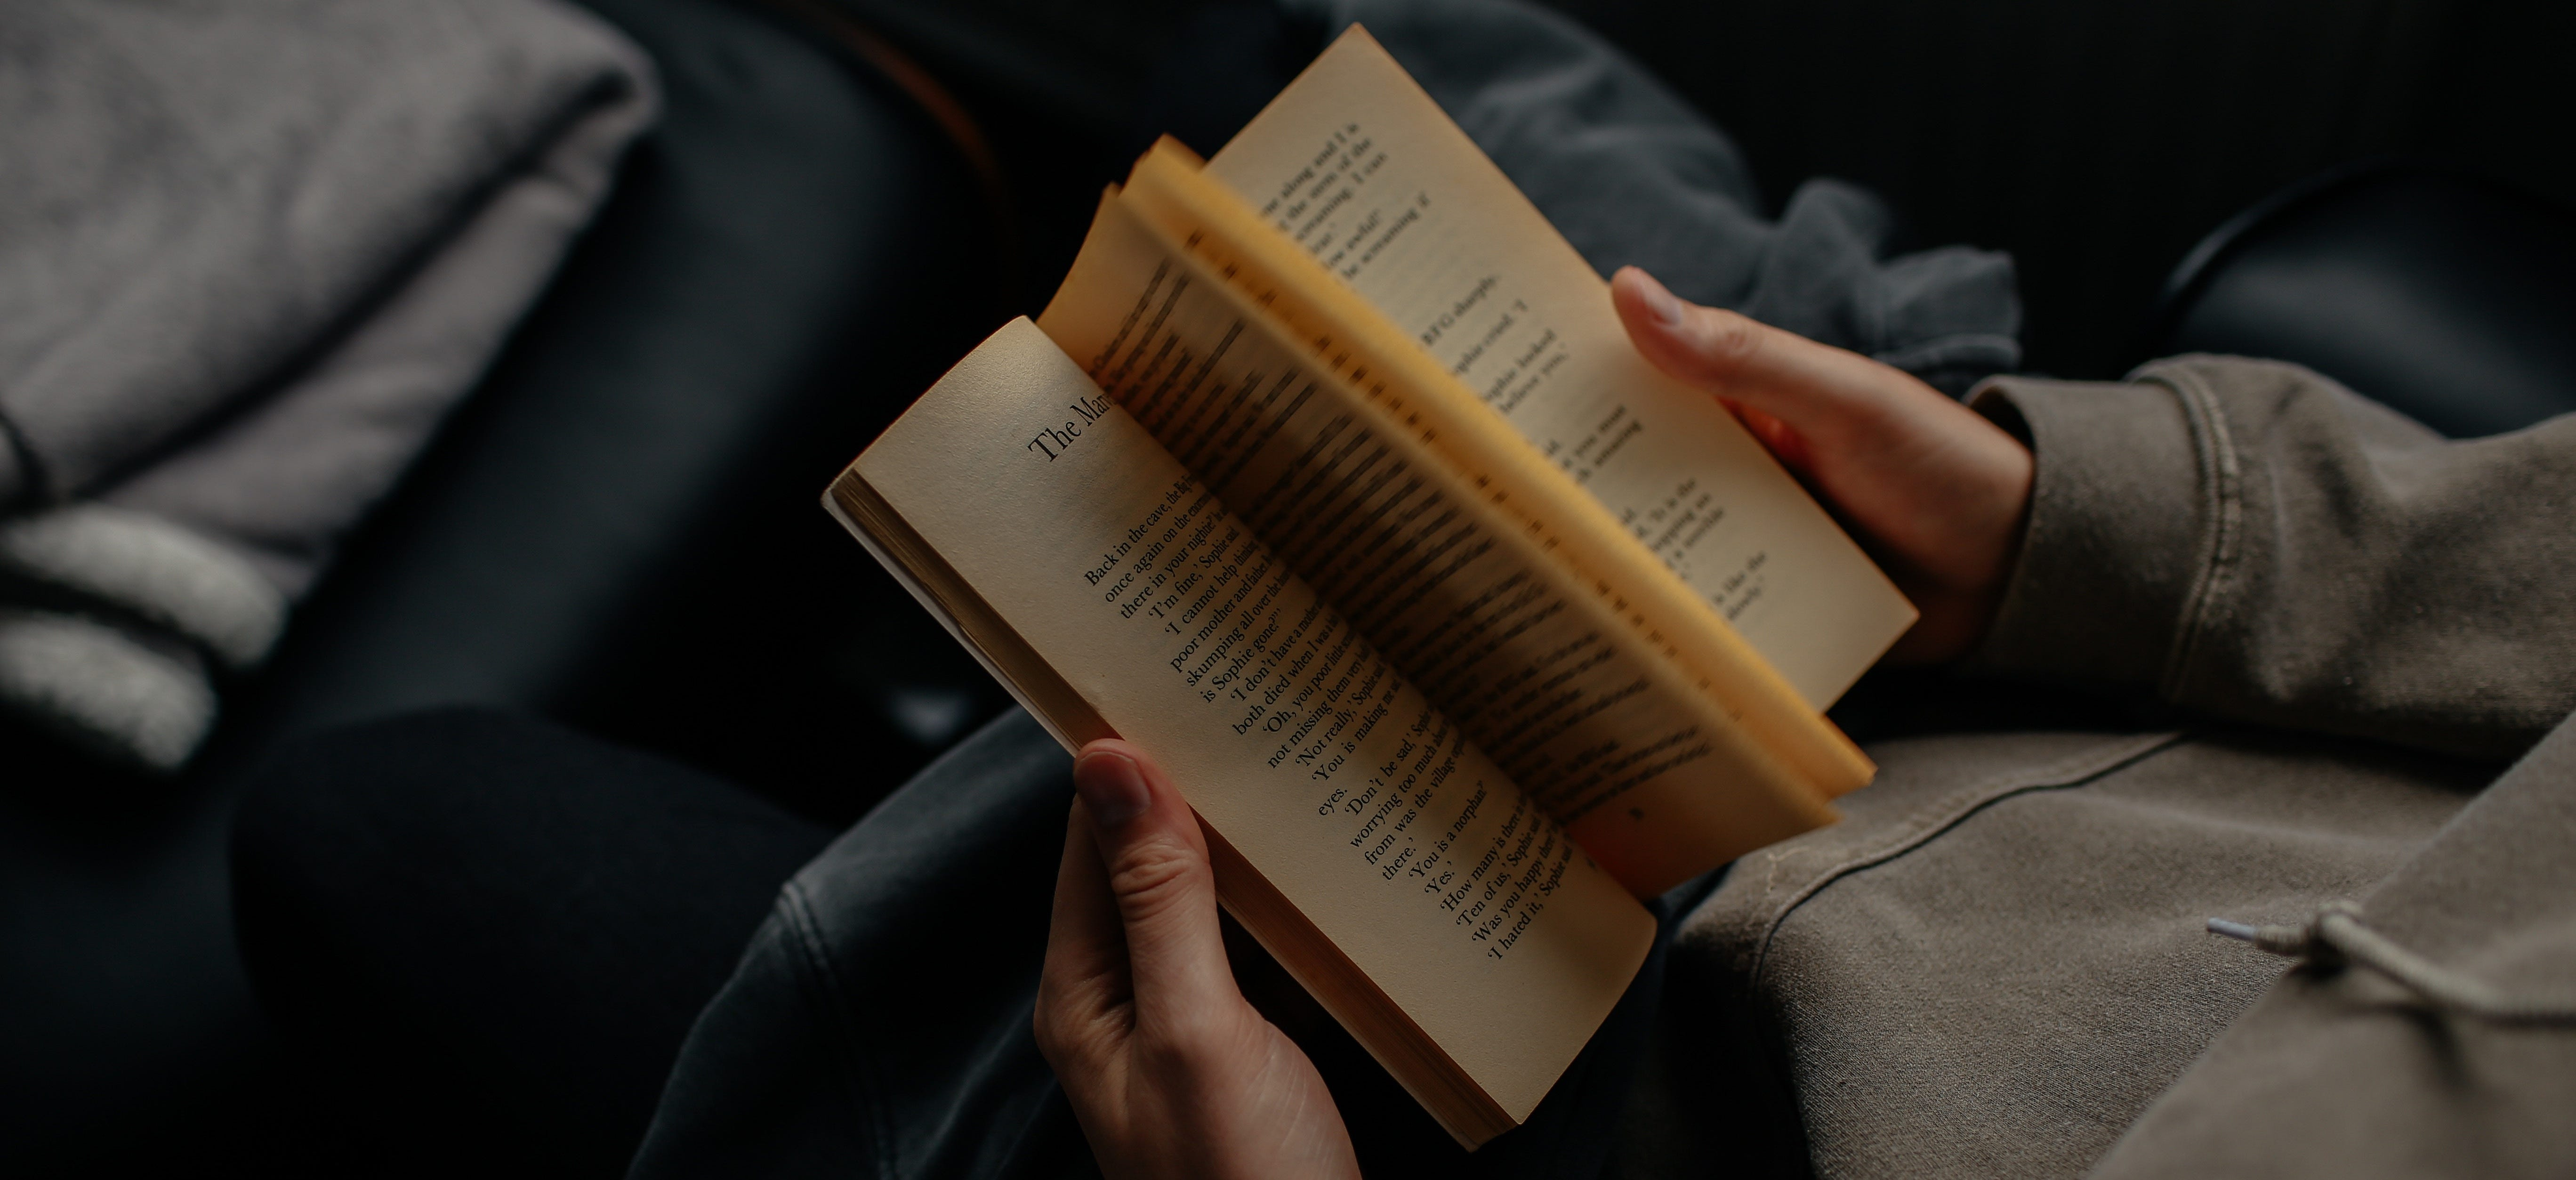


# 1. BUSINESS UNDERSTANDING

## <span style= "color:orange">1.1 Overview </span>

In the era of exponential data growth, the emergence of more sophisticated systems leveraging big data has become increasingly prevalent. Among these systems, recommendation systems have proven to be valuable information filtering tools, enhancing search results by providing users with more relevant items based on their search queries or browsing history. Major technology companies have embraced recommendation systems across various applications: YouTube utilizes them to determine the next autoplay video, while Spotify employs them to curate personalized "Made for You" daily mixes.

In line with this project's objectives, we aim to harness the power of data analysis to recommend the best books to users. By examining user behaviors, both individual and collective, we can derive insights that enable us to deliver tailored book recommendations that align with their interests and preferences.

The underlying principle of this project is to leverage data-driven techniques to understand user preferences and behaviors. By analyzing user interactions, historical data, and patterns, we can uncover valuable insights that inform our recommendation system. This allows us to present users with a curated list of book suggestions that are highly likely to resonate with their tastes.

### <span style= "color:orange">1.2 Problem Statement </span>

Book-Crossing is looking to optimize their recommendation system such that it will suggest different and new books with the emphasis on relevancy to the user tastes

We have therefore been appointed as Junior Data Scientists by Book-Crossing so as to optimize their book recommendation system. This will enhance customer engagement, and optimize relevant user recommendations.

### <span style= "color:orange">1.3 The Data </span>

The data set was obtained from [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

The Book-Crossing dataset comprises 3 files:

* `Users`: Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
* `Books`: Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
* `Ratings`: Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### <span style= "color:orange">1.4 Business Objectives </span>

1. To develop a book recommendation system that provides personalized suggestions to users based on behaviors and preferences of similar users.
2. To analyze top book sales per city
3. To find the most popular books so as to infer genres
4. To find most popular authors
5. To find the voting frequency of the users


### <span style= "color:orange">1.5 Project Goals </span>

* Develop a prediction model within the book recommendation system that can accurately recommend a particular book, based on preferences of similar users
* Establish evaluation metrics to assess the performance of the recommendation system.
* Create a function that will return top N recommendations for a user.
* Deploy and Implement a real-time recommendation feature that can adapt to users' changing preferences and provide up-to-date book suggestions.

### <span style= "color:orange">1.6 Success Metric </span>

1. Root Mean Squared Error of close to 0 to evaluate model efficiency.

### <span style= "color:orange">1.7 Methods Used </span>

* Descriptive Statistics
* Data Visualization
* Machine Learning

# 2.0 DATA UNDERSTANDING

Load Libraries

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.prediction_algorithms import KNNWithMeans
from surprise.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import scipy
import math

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix


from surprise.prediction_algorithms import knns

from surprise.similarities import cosine, msd, pearson
from surprise import accuracy
import joblib

#### <span style= "color:orange"> 2.1 Loading the dataset </SPAN>

In [11]:
def read_data(path, encoding='latin-1', sep=';', on_bad_lines='skip'):
    """A simple function that reads the data"""
    data = pd.read_csv(path, encoding=encoding, sep=sep, on_bad_lines=on_bad_lines)
    return data

book_ratings = read_data('BX-Book-Ratings.csv')
books = read_data('BX-Books.csv')
users = read_data('BX-Users.csv')

we have three datasets:
* `books`
* `users`
* `rating`

Let us explore them by viewing first five rows of each

In [12]:
""" calling on variable book_ratings to view the first 5 rows"""

book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
""" calling on variable books to view the first five rows"""

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
""" calling on variable users to view the first 5 rows"""

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### <span style= "color:orange"> 2.2 Preliminary Data understanding </SPAN>

In [15]:

def get_info_shape_stats(dataset, dataset_name):

    """A simple function to check the shape, info and descriptive statistics of the dataset"""
    
    print('The Dataset:', dataset_name )
    print(f"has {dataset.shape[0]} rows and {dataset.shape[1]} columns")
    print('---------------------------')
    print('---------------------------')
    print(dataset.info())
    print('---------------------------')
    print('----------------------------')
    print(dataset.describe())

In [16]:
"""calling on the function get_info_shape_stats"""

get_info_shape_stats(book_ratings, 'Book Ratings')

The Dataset: Book Ratings
has 1149780 rows and 3 columns
---------------------------
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None
---------------------------
----------------------------
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


The 'book_ratings' dataset contains a total of 1,149,780 rows and 3 columns. Here are some key observations about the dataset:

- The dataset consists of the following columns:
    - User-ID: An anonymized identifier for the users.
    - ISBN: The unique identifier for the books.
    - Book-Rating: The rating given by the users for the books. Ratings range from 0 to 10, with higher values indicating higher appreciation.

- The dataset has no missing values as indicated by the 'Non-Null Count' column.

- Data types:
    - User-ID and Book-Rating columns are of integer type (int64).
    - ISBN column is of object type (string).

- Descriptive Statistics:
    - The mean book rating is approximately 2.87, indicating a relatively low average rating.
    - The standard deviation of book ratings is around 3.85, indicating a wide range of rating values.
    - The minimum book rating is 0, while the maximum rating is 10.
    - The majority of book ratings (75%) fall within the range of 0 to 7.

These observations provide an initial understanding of the 'book_ratings' dataset and its characteristics. Further analysis and processing can be performed based on this information to build the recommendation system.



In [8]:
# calling on the function get_info_shape_stats

get_info_shape_stats(books, 'Books')

The Dataset: Books
has 271360 rows and 8 columns
---------------------------
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
---------------------------
----------------------------
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271359               271360   
unique      271360          24

The 'books' dataset contains a total of 271,360 rows and 8 columns. Here are some key observations about the dataset:

- The dataset consists of the following columns:
    - ISBN: The unique identifier for the books.
    - Book-Title: The title of the books.
    - Book-Author: The author of the books.
    - Year-Of-Publication: The year when the books were published.
    - Publisher: The publisher of the books.
    - Image-URL-S: The URL of the small-sized cover image of the books.
    - Image-URL-M: The URL of the medium-sized cover image of the books.
    - Image-URL-L: The URL of the large-sized cover image of the books.

- The dataset has some missing values in the 'Book-Author', 'Publisher', and 'Image-URL-L' columns, as indicated by the 'Non-Null Count' column.

- Data types:
    - All columns in the dataset are of object type (string).

- Descriptive Statistics:
    - The dataset has 271,360 unique ISBN values, indicating no duplicate ISBNs.
    - The most frequent book in the dataset is "Selected Poems" with 27 occurrences.
    - The most frequent book author is "Agatha Christie" with 632 occurrences.
    - The most common year of publication is 2002, with 13,903 books published in that year.
    - The dataset includes books from various publishers, with the most frequent publisher being "Harlequin" with 7,535 occurrences.

These observations provide an initial understanding of the 'books' dataset and its characteristics. Further analysis and processing can be performed based on this information to enhance the book recommendation system.

In [9]:
# calling on the function get_info_shape_stats

get_info_shape_stats(users, 'Users')

The Dataset: Users
has 278858 rows and 3 columns
---------------------------
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None
---------------------------
----------------------------
            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000


The 'users' dataset contains a total of 278,858 rows and 3 columns. Here are some key observations about the dataset:

- The dataset consists of the following columns:
    - User-ID: An anonymized unique identifier for the users.
    - Location: The location of the users.
    - Age: The age of the users.

- The dataset has some missing values in the 'Age' column, as indicated by the difference between the 'Non-Null Count' and the total number of rows.

- Data types:
    - The 'User-ID' column is of integer type.
    - The 'Location' column is of object type (string).
    - The 'Age' column is of float type.

- Descriptive Statistics:
    - The dataset has 278,858 unique User-ID values, indicating no duplicate User-IDs.
    - The minimum age in the dataset is 0, indicating some missing or invalid age values.
    - The maximum age in the dataset is 244, which could be an outlier or erroneous value.
    - The average age of the users is approximately 34.75, with a standard deviation of 14.43.
    - The age values range from 0 to 244, with the majority of users falling within the 24 to 44 age range.

These observations provide an initial understanding of the 'users' dataset and its characteristics. Further analysis and processing can be performed based on this information to enhance the book recommendation system.

In [17]:
def data_types(data, dataset_name):

    """A simple function to check the data types on th datasets """

    print("Dataset:",dataset_name, "has",len( data.select_dtypes(include='number').columns),
                "Numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "Categorical columns")

    print('*****************************************************')
    print('*****************************************************')

    print('Numerical Columns:', data.select_dtypes(include='number').columns)
    print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

In [11]:
# calling on the data_types function 

data_types(users, 'Users') 

Dataset: Users has 2 Numeric columns
and 1 Categorical columns
*****************************************************
*****************************************************
Numerical Columns: Index(['User-ID', 'Age'], dtype='object')
Categorical Coulumns: Index(['Location'], dtype='object')


The 'users' dataset has 2 numerical columns and 1 categorical column. Here's a breakdown of the columns:

- Numerical Columns: 'User-ID' and 'Age'
    - The 'User-ID' column is of type 'object'.
    - The 'Age' column is of type 'object'.

- Categorical Column: 'Location'
    - The 'Location' column is of type 'object'.

In [12]:
""" calling on the data_types function """

data_types(books, 'Books')

Dataset: Books has 0 Numeric columns
and 8 Categorical columns
*****************************************************
*****************************************************
Numerical Columns: Index([], dtype='object')
Categorical Coulumns: Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [13]:
# calling on the data_types function 

data_types(book_ratings, 'Book Ratings')

Dataset: Book Ratings has 2 Numeric columns
and 1 Categorical columns
*****************************************************
*****************************************************
Numerical Columns: Index(['User-ID', 'Book-Rating'], dtype='object')
Categorical Coulumns: Index(['ISBN'], dtype='object')


The 'book_ratings' dataset has 2 numerical columns and 1 categorical column. Here's a breakdown of the columns:

- Numerical Columns: 'User-ID', 'Book-Rating'
    - The 'User-ID' and 'Book-Rating' columns are of type 'int64'.

- Categorical Column: 'ISBN'
    - The 'ISBN' column is of type 'object'.

# 3. DATA PREPARATION

#### <span style= "color:orange"> 3.1 Data Cleaning </SPAN>

Duplicates

In [18]:
duplicates = []

def check_duplicates(data):

    """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
    
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The Dataset has No Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

In [19]:
check_duplicates(book_ratings) # checking for duplicates in book_ratings

The Dataset has No Duplicates


In [20]:
check_duplicates(books) # checking for duplicates in books

The Dataset has No Duplicates


In [21]:
check_duplicates(users) # checking for duplicates in users

The Dataset has No Duplicates


Missing Values

In [22]:
def missing_values(data):

    """ Function for checking null values in percentage in relation to length of the dataset """

    if data.isnull().any().any() == False :

        print("There Are No Missing Values")

    else:

        missing_values = data.isnull().sum().sort_values(ascending=False)

        missing_val_percent = ((data.isnull().sum()/len(data)).sort_values(ascending=False))

        missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

        return missing_df[missing_df['Percentage %'] > 0]

In [23]:
missing_values(book_ratings) # checking for missing values in book ratings

There Are No Missing Values


In [24]:
missing_values(books) # checking for missing values in books

,Missing Values,Percentage %
Image-URL-L,3,0.000011
Book-Author,2,0.000007
Publisher,2,0.000007


The function has identified three columns with missing values: Image-URL-L, Publisher, and Book-Author.

- Image-URL-L: There are 3 missing values in the Image-URL-L column, which represents the URL of the large-sized book image.
- Publisher: There are 2 missing values in the Publisher column, which represents the publisher of the book.
- Book-Author: There is 1 missing value in the Book-Author column, which represents the author of the book.

In [25]:
missing_values(users) # checking for missing values in users

,Missing Values,Percentage %
Age,110762,0.397199


The function has identified one column with missing values: Age.

Age: There are 110,762 missing values in the Age column, which represents the age of the users.

In [26]:
def dropping_columns(data, columns):

    """A simple function to drop columns with missing values"""

    drop_column = data.drop(columns=columns, inplace = True)
    
    return drop_column

columns_to_drop = users[['Age']]

dropping_columns(users, columns_to_drop)

In [27]:
def drop_rows(data, columns):
    
    """A simple function to remove the rows of columns that have missing values """
    
    new_data = data.dropna(subset=columns, inplace=True)
    return new_data

col = ['Image-URL-L', 'Publisher', 'Book-Author']
drop_rows(books, col)

#### <span style= "color:orange">3.2 Feature Selection </SPAN>

In [28]:
def merge_dataframe(data_0, data_1, merge_column):
    """A function to merge the datasets based on a given column"""
    new_df = data_0.merge(data_1, on=merge_column)
    return new_df

df_rating = merge_dataframe(users, book_ratings, "User-ID")
df_rating

,User-ID,Location,ISBN,Book-Rating
0,2,"stockton, california, usa",0195153448,0
1,7,"washington, dc, usa",034542252,0
2,8,"timmins, ontario, canada",0002005018,5
3,8,"timmins, ontario, canada",0060973129,0
4,8,"timmins, ontario, canada",0374157065,0
...,...,...,...,...
1149775,278854,"portland, oregon, usa",0425163393,7
1149776,278854,"portland, oregon, usa",0515087122,0
1149777,278854,"portland, oregon, usa",0553275739,6
1149778,278854,"portland, oregon, usa",0553578596,0


In [29]:
missing_values(df_rating) # checking for missing values

There Are No Missing Values


In [30]:
check_duplicates(df_rating) # checking for duplicates

The Dataset has No Duplicates


In [31]:
get_info_shape_stats(df_rating, 'Merged DataFrame') # checking the dataset info

The Dataset: Merged DataFrame
has 1149780 rows and 4 columns
---------------------------
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   Location     1149780 non-null  object
 2   ISBN         1149780 non-null  object
 3   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 35.1+ MB
None
---------------------------
----------------------------
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


In [32]:
# merging the new dataset with the book dataset 
df_books = merge_dataframe(books, df_rating, 'ISBN')
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",0


In [33]:
get_info_shape_stats(df_books, "Combined Dataset") # check merged dataset info

The Dataset: Combined Dataset
has 1031128 rows and 11 columns
---------------------------
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031128 entries, 0 to 1031127
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031128 non-null  object
 1   Book-Title           1031128 non-null  object
 2   Book-Author          1031128 non-null  object
 3   Year-Of-Publication  1031128 non-null  object
 4   Publisher            1031128 non-null  object
 5   Image-URL-S          1031128 non-null  object
 6   Image-URL-M          1031128 non-null  object
 7   Image-URL-L          1031128 non-null  object
 8   User-ID              1031128 non-null  int64 
 9   Location             1031128 non-null  object
 10  Book-Rating          1031128 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 86.5+ MB
None
---------------------------
----------------------

In [34]:

missing_values(df_books) # check for missing values

There Are No Missing Values


In [35]:
check_duplicates(df_books) # check for duplicates

The Dataset has No Duplicates


# 4. Exploratory Data Analysis 


#### <span style= "color:orange">4.1 Univariate EDA </SPAN>

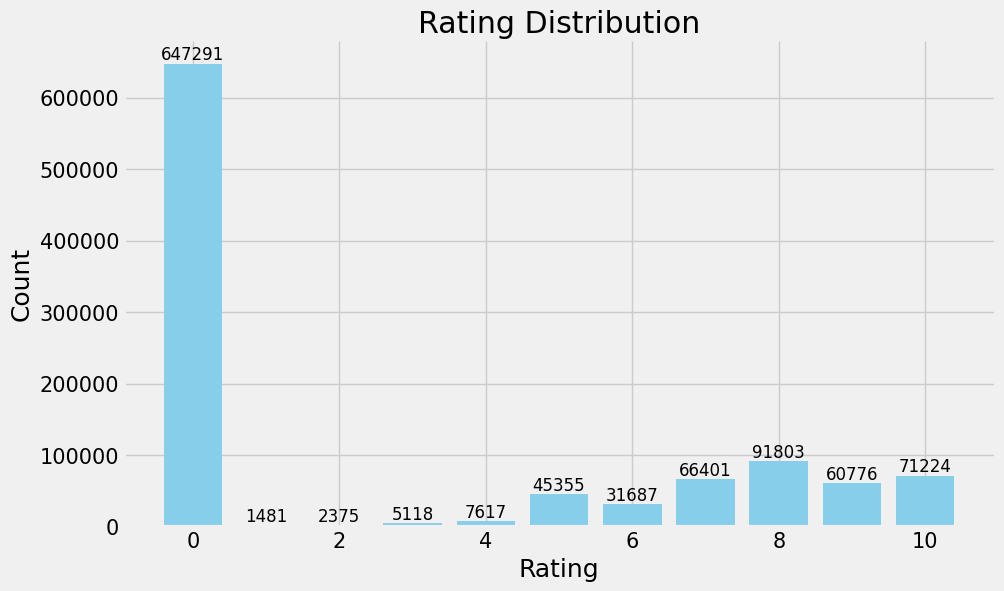

In [89]:

# Set the default font size for the plot to 15
plt.rc("font", size=15)

# Assuming your dataframe is already defined as df_books

# Calculate the frequency of each unique book rating and create a bar plot
rating_counts = df_books['Book-Rating'].value_counts(sort=False).sort_index()
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(rating_counts.index, rating_counts, color='skyblue')

# Set the title of the plot as "Rating Distribution"
plt.title('Rating Distribution')

# Set the label for the x-axis as "Rating"
plt.xlabel('Rating')

# Set the label for the y-axis as "Count"
plt.ylabel('Count')

# Set the x-axis tick labels rotation to 0 degrees for better readability
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, count in enumerate(rating_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


- The ratings are incredibly skewed, with the bulk of them being zero.

- BX-Book-Ratings provides the book rating data, as stated in the dataset description. 

- Ratings can be represented explicitly by using a scale of 1 to 10, with higher numbers signifying greater acclaim, or implicitly by using the number 0.Hence, separating the datasets for implicit and explicit assessments


In [39]:
# segragating implicit and explict ratings datasets

ratings_explicit = df_rating[df_rating['Book-Rating'] != 0]

ratings_implicit = df_rating[df_rating['Book-Rating'] == 0]

print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (433671, 4)
ratings_implicit dataset (716109, 4)


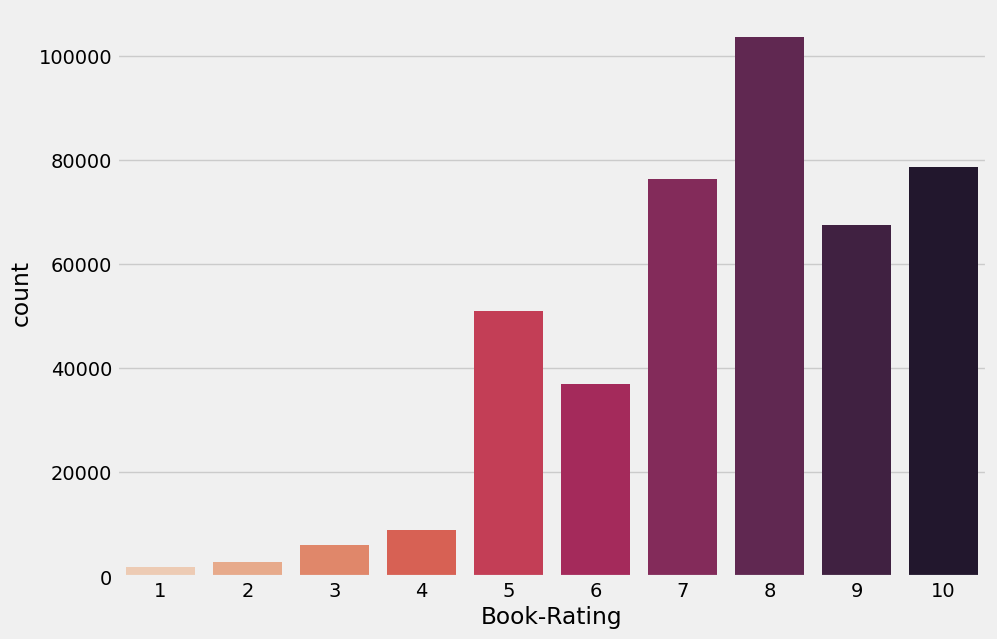

In [43]:
# Set the style of the plot to 'fivethirtyeight'

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# Create a new figure with a size of 12 inches by 8 inches
plt.figure(figsize=(10, 7))

# Creating a countplot using the 'ratings_explicit' DataFrame

# Set the x-axis to 'Book-Rating' column of the DataFrame

# Use the 'rocket_r' color palette for the bars

sns.countplot(data=ratings_explicit, x='Book-Rating', palette='rocket_r');


- Higher ratings are more prevalent among users, and rating 8 has received the most ratings, as can be seen.

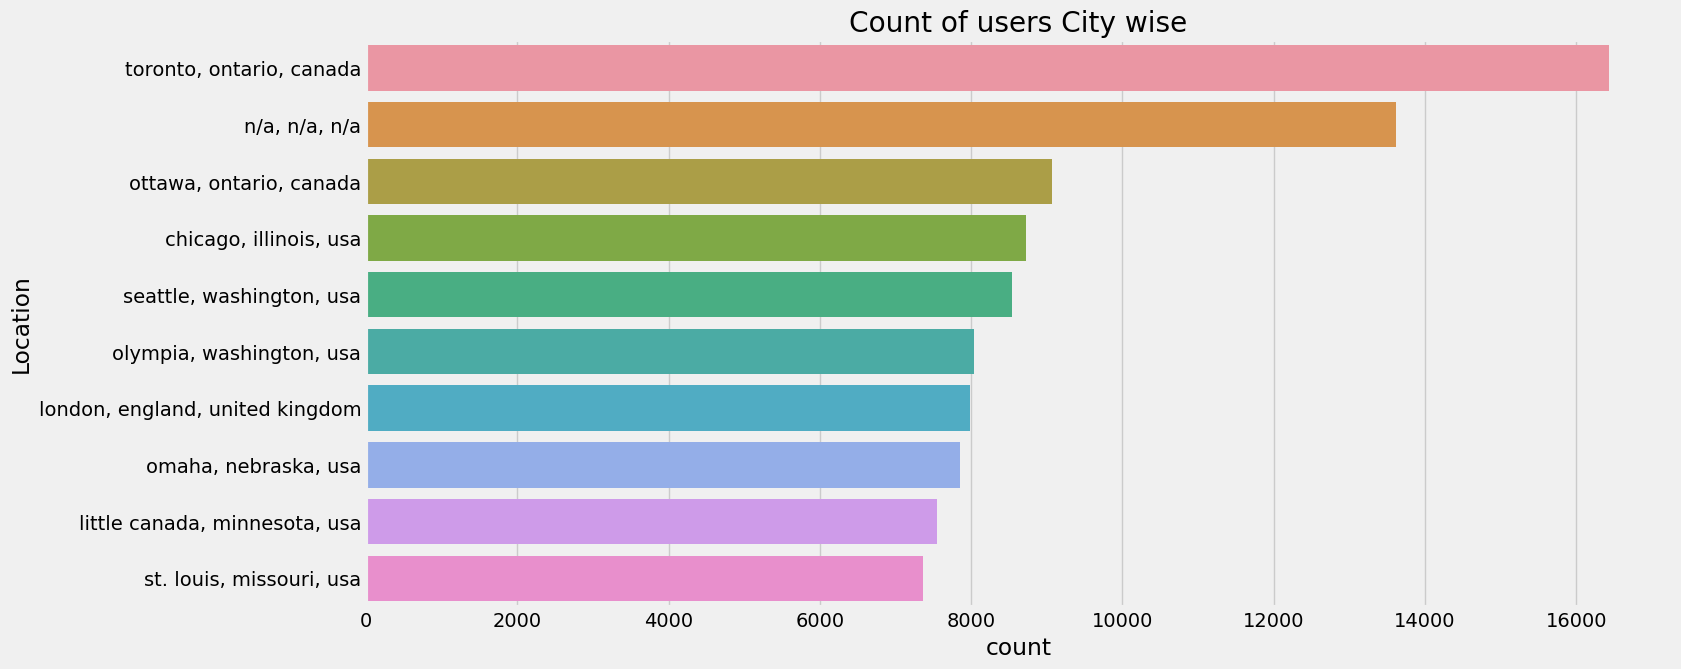

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(y='Location',data=df_rating,order=pd.value_counts(df_rating['Location']).iloc[:10].index)
plt.title('Count of users City wise');

- The city of Toronto has the highest count of user interacting with the book community website.
- The count factor is influenced by the city populations with toronto having a higher population compared to other cities.
- The subsequent states have an almost equal number of user, the margin is not large.
- The n/a represents user that interacted with the book crossing website but preferred to keep their locations private

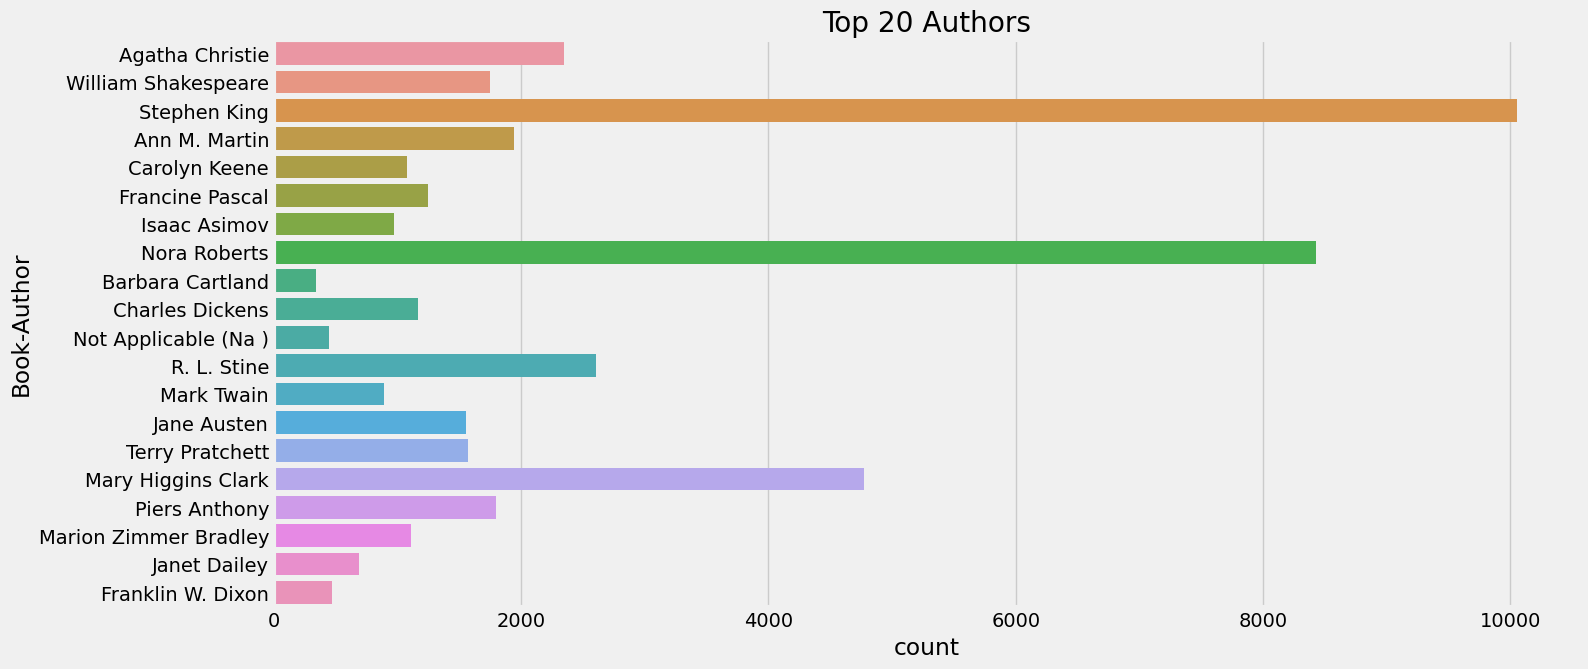

In [64]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=df_books,order=pd.value_counts(books['Book-Author']).iloc[:20].index)
plt.title('Top 20 Authors');

- This shows the most popular authors going by how many times their books have been read
- Stephen King books seem to have struck a chord with the demographic followed by Nora Roberts
- This could also allude to the popular genres since the authors are specialized in writing specific genres for example Stephen King is well known horror and Mystery novelist.
  

In [86]:
def calculate_popularity(df, column_name):

    """Calculates the popularity of Books by taking into consideration number of times read"""

    popularity_df = pd.DataFrame(df[column_name].value_counts())
    return popularity_df

popularity_df = calculate_popularity(df_books, 'Book-Title')
top_15 = popularity_df.head(15)

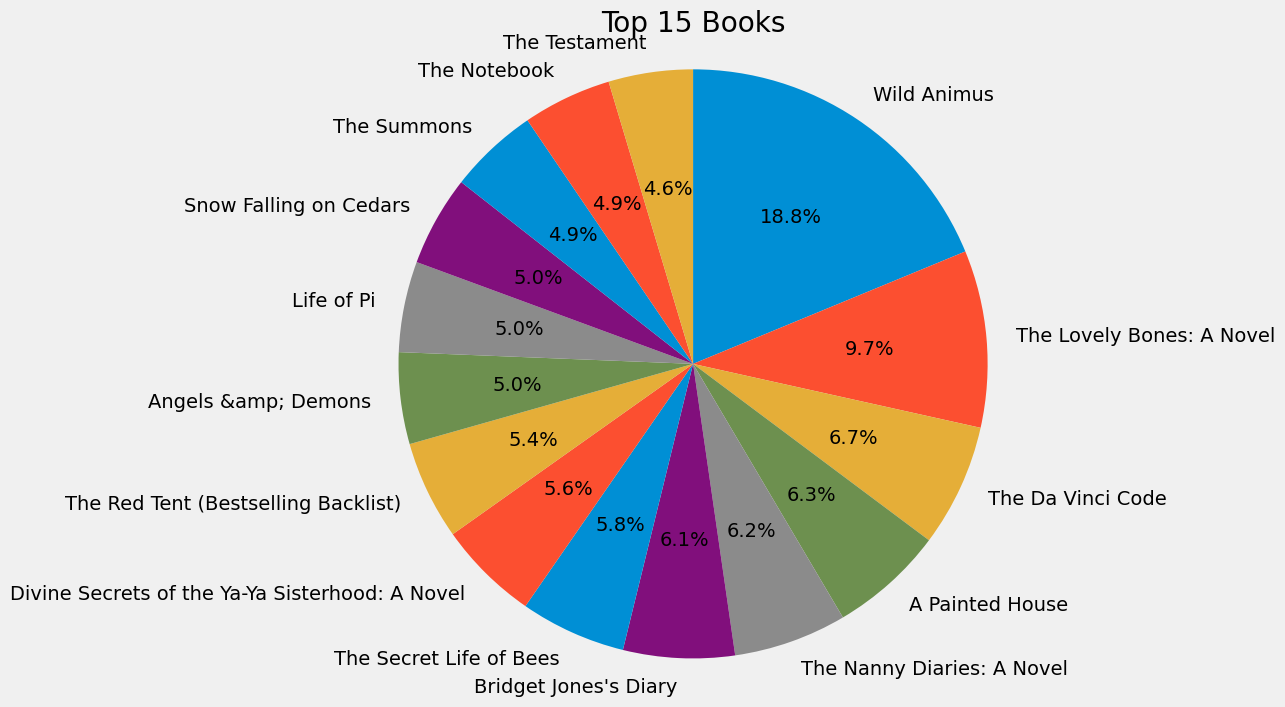

In [87]:
# Set up the labels and counts for the pie chart
labels = top_15.index
counts = top_15['count']

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the figure
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Top 15 Books')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

- The book `Wild Animus` seems to be popular among readers with a relatively higher percentage.
- The popularity of the books can be attributed to factors such as the author or quality of stories
- It would be helpful to stock the libraries with similar contents

# 5. Feature Selection


In [90]:

def filter_active_users(dataframe, threshold):

    """Filter the dataframe to include only users who have actively rated more than the threshold"""
    
    # Filter the DataFrame based on the count of each unique User-ID
    user_counts = dataframe['User-ID'].value_counts()
    filter = user_counts > threshold

    # Get the index values of the filtered rows
    filtered_index = filter[filter].index

    # Create a new DataFrame by selecting only the rows where User-ID is in the filtered index
    filtered_df = dataframe[dataframe['User-ID'].isin(filtered_index)]

    return filtered_df

df_filtered = filter_active_users(df_books, 300)
df_filtered.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,"victoria, british columbia, canada",0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,"ottawa, ontario, canada",0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,"milpitas, california, usa",10
26,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,197659,"indiana, pennsylvania, usa",9


In [91]:
def calculate_rating_count(dataframe):

    """A Simple Function to Calculate the Number of Times each book has been rated"""

    # Group the dataframe by 'Book-Title' and count the occurrences of 'Book-Rating' for each title
    rating_count = dataframe.groupby('Book-Title')['Book-Rating'].count().reset_index()

    # Rename the 'Book-Rating' column to 'rating_count'
    rating_count.rename(columns={'Book-Rating': 'rating_count'}, inplace=True)

    # Merge the original dataframe with the 'rating_count' dataframe based on 'Book-Title'
    new_df = dataframe.merge(rating_count, on='Book-Title')

    # Display the first few rows of the merged dataframe
    return new_df

new_book_df = calculate_rating_count(df_filtered)
new_book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Book-Rating,rating_count
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",8,3
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,"victoria, british columbia, canada",0,3
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,"ottawa, ontario, canada",0,3
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,"milpitas, california, usa",10,2
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,197659,"indiana, pennsylvania, usa",9,2


In [70]:
def filter_rating_count(dataframe, threshold):
    
    """A Simple Funtion to Filter the dataframe based on a minimum rating count"""

    # Apply the filter to the 'dataframe' using the 'loc' function
    filtered_df = dataframe.loc[dataframe['rating_count'] >= threshold, :]

    # Display the first few rows of the filtered dataframe
    return filtered_df

rating_more_50 = filter_rating_count(new_book_df, 50)
rating_more_50.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Book-Rating,rating_count
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,"n/a, n/a, n/a",9,88
6,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,"raleigh, north carolina, usa",0,88
7,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,"san antonio, texas, usa",9,88
8,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,"evanston, illinois, usa",0,88
9,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,"pleasanton, california, usa",0,88


If you preview the user ID and Book-Tittle you will get that a user has rated a book more than once. This can be brought about reading the book multiple times and having different different opinions on it. Let's preview the dataset that coontains the two columns 

In [95]:
# Select the 'User-ID' and 'Book-Title' columns from the 'rating_more_50' dataframe

book_user_id_df = rating_more_50[['User-ID', 'Book-Title']]

book_user_id_df


,User-ID,Book-Title
5,11676,The Kitchen God's Wife
6,36836,The Kitchen God's Wife
7,46398,The Kitchen God's Wife
8,113270,The Kitchen God's Wife
9,113519,The Kitchen God's Wife
...,...,...
171955,235105,M Is for Malice
171956,242824,M Is for Malice
171957,254899,M Is for Malice
171958,258534,M Is for Malice


In [94]:
# checking for duplicates

check_duplicates(book_user_id_df)

Duplicated rows constitute of 8.4 % of our dataset


Let's go ahead and create the final dataframe and remove the duplicates in the two columns 

In [96]:
# Drop duplicate rows based on the combination of 'User-ID' and 'Book-Title'

final_df = rating_more_50.drop_duplicates(subset=['User-ID', 'Book-Title'])

# Display the first few rows of the resulting dataframe

final_df.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Book-Rating,rating_count
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,"n/a, n/a, n/a",9,88
6,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,"raleigh, north carolina, usa",0,88
7,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,"san antonio, texas, usa",9,88
8,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,"evanston, illinois, usa",0,88
9,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,"pleasanton, california, usa",0,88


In [97]:
get_info_shape_stats(final_df, 'Final DataFrame')

The Dataset: Final DataFrame
has 34365 rows and 12 columns
---------------------------
---------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 34365 entries, 5 to 171959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 34365 non-null  object
 1   Book-Title           34365 non-null  object
 2   Book-Author          34365 non-null  object
 3   Year-Of-Publication  34365 non-null  object
 4   Publisher            34365 non-null  object
 5   Image-URL-S          34365 non-null  object
 6   Image-URL-M          34365 non-null  object
 7   Image-URL-L          34365 non-null  object
 8   User-ID              34365 non-null  int64 
 9   Location             34365 non-null  object
 10  Book-Rating          34365 non-null  int64 
 11  rating_count         34365 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.4+ MB
None
---------------------------
-----------

- The final DataFrame consists of 34,365 rows and 12 columns. Here is a summary of the dataset
- The average book rating is approximately 1.82.
- The average rating count for books is around 84.93.
- The minimum rating count is 50, indicating that only books with at least 50 ratings are included in the dataset.
- The maximum rating count is 223, suggesting that some books have received a high number of ratings.

# 5. Modelling

## Memory Based Collaborative Filtering 

>> With memory/neighborhood-based collaborative filtering methods, we are attempting to quantify just how similar users and items are to one another and getting the top N recommendations based on that similarity metric. 

>> We will be using UserID, Book Title and Book Reating columns to make our predictions

### <span style= 'color:orange'> 5.1 Nearest Neighbors using Cosine Similarity </span>
>> We will implement the brute force algorithm in the Nearest Neighbors class.
>> We will be using cosine similariry which determines how vectors are related to each other.

In [98]:
# creating a pivot table

book_pivot = final_df.pivot_table(columns='User-ID', index='Book-Title', values= 'Book-Rating')
book_pivot.fillna(0, inplace=True)
book_pivot.head()

User-ID,2276,3363,4385,6251,6543,6575,7158,7346,8681,8936,...,270713,271284,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0


In [99]:
#creating a sparse matrix to fit into our model
book_sparse = csr_matrix(book_pivot)
book_sparse

<477x497 sparse matrix of type '<class 'numpy.float64'>'
	with 7912 stored elements in Compressed Sparse Row format>

In [107]:
# instantiating Nearest Neighbors 
nearest_neighbor_model = NearestNeighbors(metric='cosine', algorithm='brute')

#fitting the model to the sparse matrix
model = nearest_neighbor_model.fit(book_sparse)

In [101]:

def recommend_book(book_name):

    """  Definining a function to recommend books based on a given book name """

    # Find the index of the input book name in the book_pivot index array

    book_id = np.where(book_pivot.index == book_name)[0][0]
    
    # Compute the distances and suggestions using the nearest_neighbor_model

    distance, suggestion = nearest_neighbor_model.kneighbors(book_pivot.iloc[237,:].values.reshape(1, -1), n_neighbors=6)

    # Iterate over each suggestion

    for i in range(len(suggestion)):

        # Retrieve the book names from the book_pivot index based on the suggestions

        books = book_pivot.index[suggestion[i]]

        # Print the recommended book names

        for j in books:

            print(j)

# Specify the book name for which recommendations will be made

book_name = 'Wuthering Heights'

# Call the recommend_book function with the specified book name

recommend_book(book_name)


Pigs in Heaven
The Poisonwood Bible
The Shipping News : A Novel
A Thousand Acres (Ballantine Reader's Circle)
Disclosure
Big Stone Gap: A Novel (Ballantine Reader's Circle)


### <span style= 'color:orange'> 5.1 KNNwithMeans </span>


>> This algorithm leverages neighborhood information, handles user or item biases through rating adjustment, and aims to provide accurate predictions for rating prediction tasks in collaborative filtering.

>> We wil be using pearson similarity matrix

In [ ]:
# Extract user IDs, ISBNs, and ratings from the final_df DataFrame
user_ids = final_df['User-ID'].values
isbns = final_df['ISBN'].values
ratings = final_df['Book-Rating'].values

# Create a new DataFrame to store the extracted data
data = pd.DataFrame({
    'User-ID': user_ids,
    'ISBN': isbns,
    'Book-Rating': ratings
})

# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 10))

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(data, reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [432]:
# Specify similarity metrics and user-based approach for KNNWithMeans
sim_pearson = {"name": "pearson", "user_based": True}

# Instantiate KNNWithMeans with the specified similarity options
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)

# Train the KNNWithMeans model on the training set
knn_means.fit(trainset)

# Make predictions on the test set
predictions = knn_means.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
print(accuracy.rmse(predictions))


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.3810
3.3810217496991717


* Based on the RMSE, KNNWithMeans has a 3.38 chance of making an error while making making predictions.

* Let's attempt to lower the RMSE

>> Although memory based collaborative filtering setup is relatively simple to write, it doesn't scale very well at all, as it is all stored in memory!
Instead, we should try using a model-based (based on matrix factorization) recommendation algorithm. These are inherently more scalable and can deal  withhigher sparsity level than memory-based models, and are considered more powerful due to their ability to pick up on "latent factors" in the relationships between what sets of items users like. 

### <span style= 'color:orange'> 5.2 Model Based Collaborative Filtering Recommender </span>


>> Model based collaborative filtering approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in a lower-dimensional space.
The goal of this section is to compare SVD and SVDpp algorithms, try optimizing parameters and explore obtained results.Let's start by preparing our dataset for modelling

In [433]:
# creating a new dataframe that contains only the relevant columns 

final_df.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [436]:
# Set the threshold for the minimum number of ratings per user
user_ratings_threshold = 3

# Count the number of ratings for each user in final_df
filter_users = final_df['user_id'].value_counts()

# Filter out users who have at least user_ratings_threshold ratings
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

# Create a new DataFrame, df_ratings_top, by keeping only the records from final_df
# where the user_id is present in the filter_users_list
df_ratings_top = final_df[final_df['user_id'].isin(filter_users_list)]

# Print the information about the filtering
print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))


Filter: users with at least 3 ratings
Number of records: 34361


In [438]:
# Set the threshold percentage for the most frequently rated books
book_ratings_threshold_perc = 0.1

# Calculate the threshold value based on the unique number of books in df_ratings_top
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

# Filter out books that are among the most frequently rated
filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()

# Create a new DataFrame, df_ratings_top, by keeping only the records from df_ratings_top
# where the isbn is present in the filter_books_list
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

# Print the information about the filtering
print('Filter: Top %d%% Most Frequently Rated Books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))


Filter: Top 10% Most Frequently Rated Books
Number of records: 12626


Filtering out least active users worked  to address data sparsity .

Reducing the number of users with limited ratings improved our data quality by allowing us to only focus on users who had provided sufficient ratings.

Filtering top most rated books allowed us to avoid popularity bias and enhance user engagement

### <span style = 'color:orange'>5.3 SVD (Singular Value Decomposition) </span>

>> SVD is a widely used matrix decomposition method that works by reducing dimensionality of the user item matrix by extracting its latent factors and capturing underlying patterns. We will be using UserID, ISBN and Book Rating features to extract latent factors to make our recommendations

In [441]:
def evaluate_model(df, model_class, rating_scale=(1, 10), cv=3):
    """
    A function to read our data into a Surprise Dataset format, instantiate a model, and perform cross-validation.
    
    Args:
        df (DataFrame): Input DataFrame containing user_id, isbn, and book_rating columns.
        model_class (class): Class of the model to be instantiated.
        rating_scale (tuple, optional): Tuple specifying the rating scale range. Default is (1, 10).
        cv (int, optional): Number of cross-validation folds. Default is 3.
    
    Returns:
        cv_results_df (DataFrame): DataFrame containing the mean cross-validation results.
    """

    # Create a Reader object with the specified rating scale
    reader = Reader(rating_scale=rating_scale)

    # Load the dataset from the DataFrame using the Reader object
    data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

    # Instantiate the model
    model = model_class()

    # Perform cross-validation using the model and the dataset
    cv_results = cross_validate(model, data, cv=cv)

    # Calculate the mean of the cross-validation results
    cv_results_df = pd.DataFrame(cv_results).mean()

    return cv_results_df

In [442]:
df = df_ratings_top.copy()
svd_results = evaluate_model(df, SVD)
print("SVD Results:")
print(svd_results)

SVD Results:
test_rmse    3.393899
test_mae     2.717881
fit_time     1.718030
test_time    0.100629
dtype: float64



### <span style = 'color:orange'>5.3 SVDpp </span>

>> The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

In [444]:
svdpp_results = evaluate_model(df, SVDpp)
print("SVDpp Results:")
print(svdpp_results)

SVDpp Results:
test_rmse     3.647254
test_mae      2.859234
fit_time     11.269644
test_time     0.485947
dtype: float64


The test_RMSE for SVD is much more better. We will go ahead and do some hyperparameter tuning on the SVD model

### <span style = 'color:orange'>5.4 Optimizing SVD Model </span>


In [445]:
df = df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

param_grid = {
    'n_factors': [10, 100, 500],
    'n_epochs': [5, 20, 50], 
    'lr_all': [0.001, 0.005, 0.02],
    'reg_all': [0.005, 0.02, 0.1]}

gs_model = GridSearchCV(
    algo_class = SVD,
    param_grid = param_grid,
    n_jobs = -1,
    joblib_verbose = 5)

gs_model.fit(data)

 #Train the SVD model with the parameters that minimise the root mean squared error
 
best_SVD = gs_model.best_estimator['rmse']
print("Tuned SVD Model RMSE", gs_model.best_score['rmse'])
print("Best Paramers", gs_model.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min


Tuned SVD Model RMSE 3.3072360455440504
Best Paramers {'n_factors': 10, 'n_epochs': 50, 'lr_all': 0.001, 'reg_all': 0.005}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  9.7min finished


Great ! We see a reduced RMSE, this is an indication of improved performance, therefore we will go ahead and settle on the tuned SVD model

This is our best Model

>> Description of improvement

The improved RMSE from 3.38 to 3.30 on the tuned SVD model indicates that the model predictions are closer to the actual values. A lower RMSE suggests a higher level of accuracy in the models performance. By reducing the RMSE, the tuned SVD model demonstrated an enhanced ability to make more precise predictions and provide better estimations. The improvement signifies increased reliability and effectiveness in capturing the underlying patterns and trends in the data.

>> Justification for choice of evaluation metrics:

 * RMSE is interpretable and aligns with user experience by reflecting accuracy of predictions. It serves as an objective function for model optimization, allowing parameter tuning to minimize prediction errors and improve recommendation quality.

>> Implications 

* Users are able to discover new books that they may not have been aware of or considered before , by analyzing similarities between users SVD can recommend most rated books among similar users
  
* Without prior user history it becomes challenging to capture user preference and generate personalized recommendations

   
>> Limitation
* Insufficient training data due to low user engagement with the rating system
* Most users did not provide their location details this would have helped fine tune recommendations
  



## <span style = 'color:cyan' > OBSERVATIONS </span>



1. `Skewed Ratings`: The ratings distribution is highly skewed, with a significant portion of ratings being zero. This indicates that a large number of users may not have provided explicit ratings for the books.

2. `Prevalence of Higher Ratings`: Higher ratings, particularly rating 8, appear to be more prevalent among users. This implies that a considerable number of users have given positive ratings to the books they have read.

3. `User Interaction and Location`: The city of Toronto has the highest count of user interactions with the book community website. This could be influenced by factors such as the city's population size and the popularity of reading among its residents. Other states have relatively similar user counts, indicating a relatively balanced user distribution.

4. `User Location Privacy`: The "n/a" category represents users who interacted with the book crossing website but preferred to keep their locations private.

5. `Popular Authors` may  indicate the popularity of specific genres associated with these authors, such as horror for Stephen King and romance for Nora Roberts.

6. `Popular Books`: Some books stand out in readership suggesting its popularity among readers. Factors like author reputation, book quality, and engaging storytelling may contribute to its popularity.



## <span style = 'color:cyan' > CONCLUSIONS </span>

- The optimised SVD model performed better than the other models with a Root Mean Squared Error of 3.30.
- Features such as genres and author popularity greatly influence book purchases. 
- While our models scaled well its worth noting that we could have done better by implementing a content-based recommender system to solve for the "cold start " problem (where a new user has no history). 
- We also faced the challenge of insufficient data which would have greatly improved model performance.

## <span style = 'color:cyan' > RECOMMENDATIONS </span>


1. `Encourage Explicit Ratings`: Since a significant portion of ratings is zero, it is important to encourage users to provide explicit ratings for the books they have read. This can be done by implementing rating prompts, offering incentives, or providing a user-friendly rating system.
   
2. `Highlight Highly Rated Books`: Identify and showcase books that have received high ratings.
3. `Tailor Recommendations by Location`: Since user interaction varies across different locations, consider providing personalized book recommendations based on the user's location. 
4. `Genre-based Recommendations`: Take advantage of the popularity of specific authors and genres. Recommend books by popular authors like Stephen King for users interested in horror or Nora Roberts for those who enjoy romance. 
5. `Promote Popular Books`: Highlight the books that have stood out in readership and gained popularity. These books have shown to resonate with readers, and promoting them can increase their visibility and attract more readership. 
6.  `Stocking their book repository`: Considering the popularity of certain books and authors, it would be beneficial to stock libraries with similar content that aligns with the preferences of the target audience.

## <span style = 'color:cyan' > DEPLOYMENT </span>

In [110]:
# getting the indexes of my book names to be used in app.py file

book_names = book_pivot.index
book_names

Index(['1st to Die: A Novel', '2nd Chance', '4 Blondes', 'A Bend in the Road',
       'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Heartbreaking Work of Staggering Genius',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       'A Man in Full', 'A Map of the World',
       ...
       'Wicked: The Life and Times of the Wicked Witch of the West',
       'Wild Animus', 'Winter Moon', 'Winter Solstice', 'Wish You Well',
       'Without Remorse', 'Wuthering Heights',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=477)

In [111]:
# importing necessary lib

from joblib import dump, load

# Pickling necessary dependancies

dump(book_pivot, 'book_pivot.pkl')
dump(model,'model.pkl')
dump(final_df, 'final_df.pkl')
dump(book_names, 'book_names.pkl')

['book_names.pkl']

* preparing the app.py and requirements txt on the `git terminal` together with and index.html

* Creating an account in AWS and creating an instance

* configuring the instance and downloading the PEM file


* downloading `WInSCP`,  `PUTTY` and `PUTTYGEN`

* generating a private key

* making a connection and deploying the model


* with this the website is launched on url - http://ec2-16-171-0-248.eu-north-1.compute.amazonaws.com:8080/ 
* kindly note the website is accessible after I have started the session, once shut from my side, this link is inaccessible

* let us proceed to make a recommendation

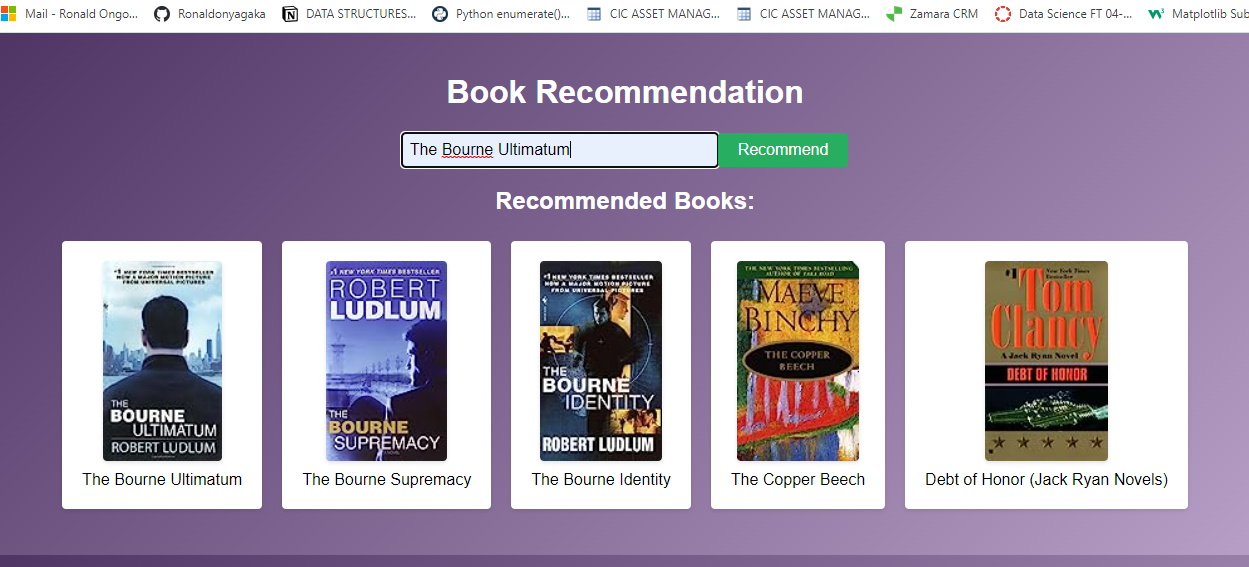